In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('INF2178_A4_data.csv')
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
summary_statistics = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

summary_statistics, missing_values


(       Unnamed: 0       Visit     MR Delay         Age        EDUC  \
 count  294.000000  294.000000   294.000000  294.000000  294.000000   
 mean   190.421769    1.489796   349.785714   76.411565   14.561224   
 std    106.686740    0.500748   400.741520    7.607074    2.884818   
 min      0.000000    1.000000     0.000000   60.000000    6.000000   
 25%     99.000000    1.000000     0.000000   71.000000   12.000000   
 50%    195.500000    1.000000     0.000000   76.000000   14.500000   
 75%    282.750000    2.000000   671.500000   81.000000   16.000000   
 max    371.000000    2.000000  1707.000000   98.000000   23.000000   
 
               SES        MMSE         CDR         eTIV        nWBV         ASF  
 count  279.000000  293.000000  294.000000   294.000000  294.000000  294.000000  
 mean     2.491039   27.259386    0.301020  1478.853741    0.731381    1.203109  
 std      1.128008    3.413454    0.381347   176.559755    0.037373    0.139365  
 min      1.000000   15.000000 

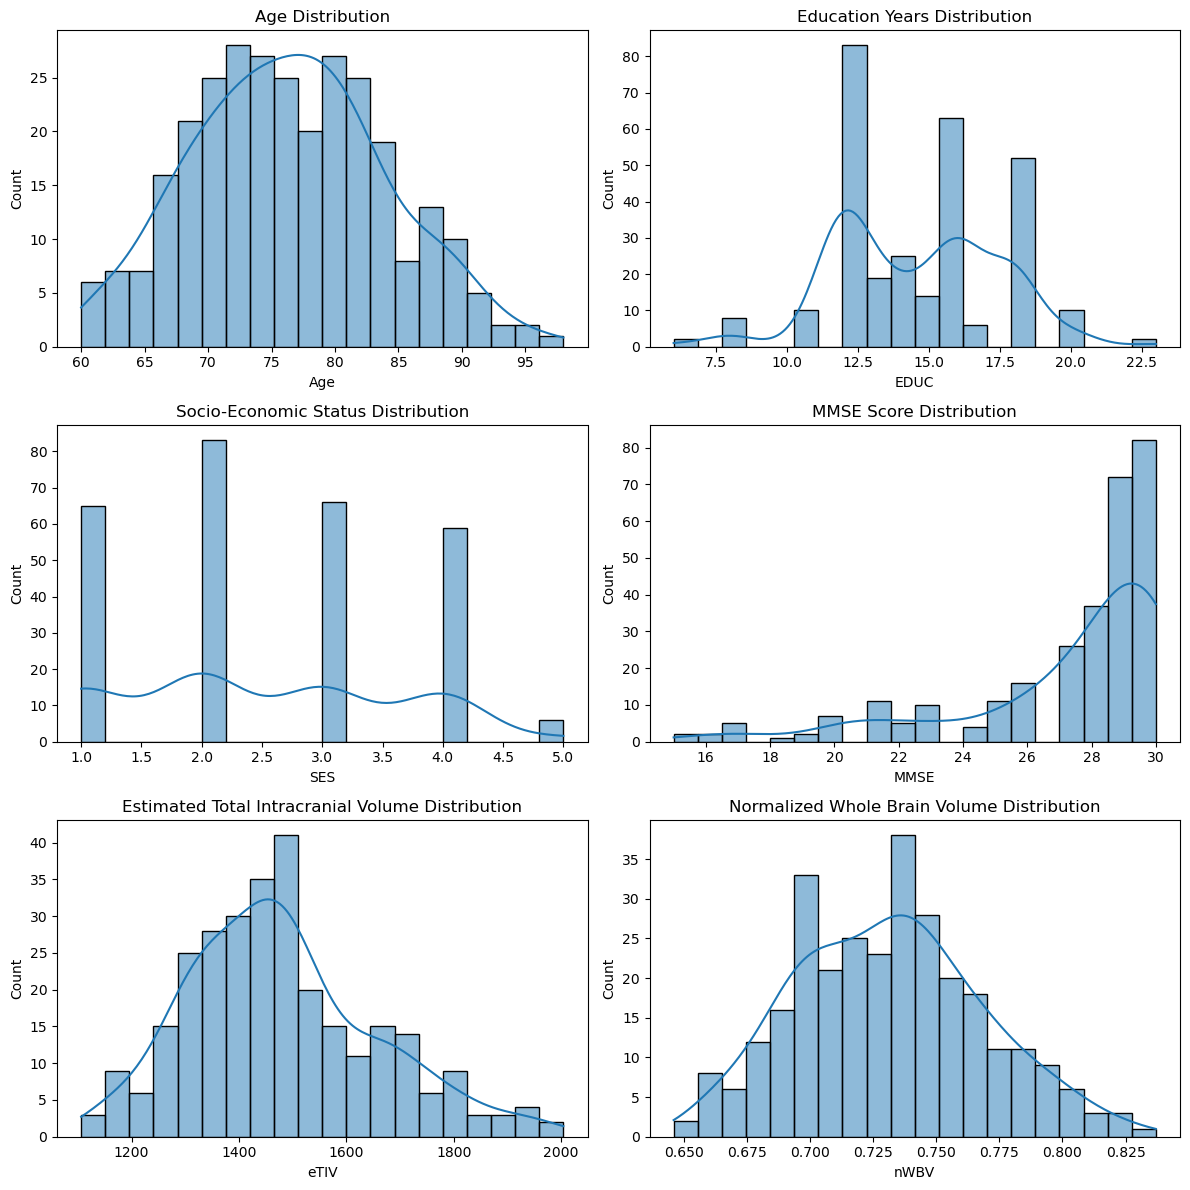

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Visualize distributions of key variables
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
sns.histplot(df['Age'], bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')
sns.histplot(df['EDUC'], bins=20, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Education Years Distribution')
sns.histplot(df['SES'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Socio-Economic Status Distribution')
sns.histplot(df['MMSE'], bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('MMSE Score Distribution')
sns.histplot(df['eTIV'], bins=20, kde=True, ax=ax[2, 0])
ax[2, 0].set_title('Estimated Total Intracranial Volume Distribution')
sns.histplot(df['nWBV'], bins=20, kde=True, ax=ax[2, 1])
ax[2, 1].set_title('Normalized Whole Brain Volume Distribution')

plt.tight_layout()


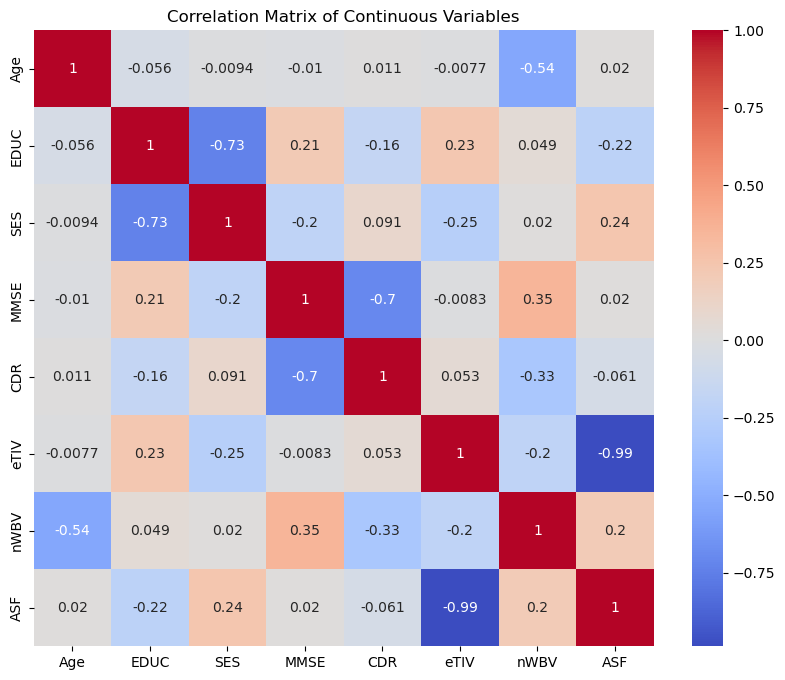

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [6]:
# Check for missing values in key columns
missing_values = df[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']].isnull().sum()
missing_values

Age      0
EDUC     0
SES     15
MMSE     1
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [7]:
from statsmodels.formula.api import mixedlm
import statsmodels.api as sm

# Handling missing values for SES and MMSE by simple imputation (mean strategy)
df['SES'] = df['SES'].fillna(df['SES'].mean())
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].mean())

# Preparing a simple model for demonstration
# Mixed Effects Model: Predicting MMSE based on Age, EDUC, and Group, with Subject ID as a random effect
model_1_formula = 'MMSE ~ Age + EDUC + C(Group)'
model_1 = mixedlm(model_1_formula, df, groups=df['Subject ID'])
model_1_fit = model_1.fit()

# Preparing a second model, focusing on brain volume (nWBV) and its association with dementia status, 
# adjusting for Age and EDUC, and considering Subject ID as a random effect
model_2_formula = 'nWBV ~ Age + EDUC + C(Group)'
model_2 = mixedlm(model_2_formula, df, groups=df['Subject ID'])
model_2_fit = model_2.fit()

# Displaying the results of both models
model_1_results = model_1_fit.summary()
model_2_results = model_2_fit.summary()

model_1_results, model_2_results


H:\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


(<class 'statsmodels.iolib.summary2.Summary'>
 """
               Mixed Linear Model Regression Results
 Model:                 MixedLM    Dependent Variable:    MMSE     
 No. Observations:      294        Method:                REML     
 No. Groups:            150        Scale:                 2.7046   
 Min. group size:       1          Log-Likelihood:        -674.3756
 Max. group size:       2          Converged:             Yes      
 Mean group size:       2.0                                        
 ------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
 ------------------------------------------------------------------
 Intercept               29.970    2.437 12.295 0.000 25.192 34.747
 C(Group)[T.Demented]    -3.879    0.735 -5.277 0.000 -5.319 -2.438
 C(Group)[T.Nondemented]  0.348    0.719  0.485 0.628 -1.060  1.757
 Age                     -0.027    0.026 -1.035 0.301 -0.077  0.024
 EDUC       

ShapiroResult(statistic=0.9219986796379089, pvalue=2.9003587725950908e-11)

<Figure size 600x400 with 0 Axes>

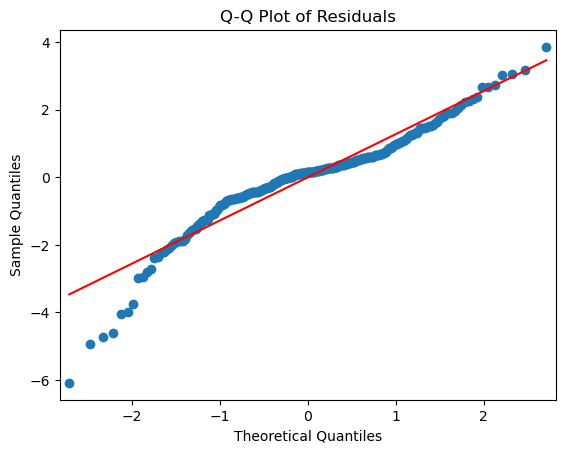

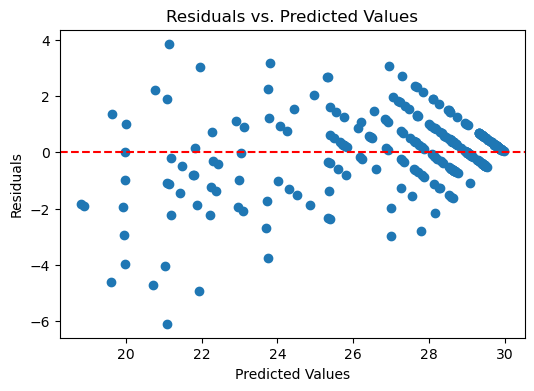

In [8]:
from scipy.stats import shapiro
import statsmodels.api as sm

# Extracting residuals
residuals = model_1_fit.resid

# Normality test using Shapiro-Wilk test
shapiro_test = shapiro(residuals)

# QQ plot for visual inspection of normality
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')

# Plotting residuals vs. predicted values for homoscedasticity
plt.figure(figsize=(6, 4))
plt.scatter(model_1_fit.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')

shapiro_test


In [9]:
from statsmodels.stats.power import TTestIndPower

# Parameters for the power analysis
effect_size = 0.7  # Given effect size
alpha = 0.05  # Significance level
power = 0.91  # Desired power

# Create a power analysis object for t-tests
power_analysis = TTestIndPower()

# Calculate the sample size needed
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')

sample_size


45.45073088568012